# Exercise 6: Linear Algebra with Python

You now have a good understanding of using Python for scientific calculations, so it is time to apply your knowledge to solve reservoir engineering problems with numerical methods!

<As discussed in the lecture, the basics steps to solve practical problems, described with partial differential equations, with numerical methods are:

1. Discretise the equation with a suitable method to derive a system of algebraic equations (SAE)
2. Solve that system of algebraic equations for a given set of boundary (and initial) conditions.

Today, we will actually start first with a look at the second step - and the extension to the first step will become clear during the next lecture!>

We will first have a look at some basic linear algebra operations and how they can be implemented in Python, and then start to use those methods to solve equations. Finally, we will write a function to create a special type of matrix that we will encounter again in the lecture - and solve this matrix with the discussed methods.

In [1]:
#from IPython.core.display import HTML
#css_file = 'nre2_style.css'
#HTML(open(css_file, "r").read())

In [7]:
from __future__ import print_function

In [8]:
%matplotlib inline

In [9]:
# the basic imports:
import numpy as np
import matplotlib.pyplot as plt

## Linear algebra operations with Python

The Python module `numpy` contains several methods to perform linear algebra operations. For a complete list, see:

http://docs.scipy.org/doc/numpy/reference/routines.linalg.html

Here some important operations:

### Creating vectors and matrices

Vectors can simply be represented as 1-d numpy arrays and matrices as multi-dimensional numpy arrays:

In [5]:
# create vectors as numpy arrays from a Python list:
v1 = np.array([1,2])
v2 = np.array([3,4])
# create a matrix as 2-D numpy array from a nested Python list:
A = np.array([[1,2],[3,4]])

In [6]:
print(v1)
print(A)

[1 2]
[[1 2]
 [3 4]]


We can use a variety of typical operations on these objects. The transpose of a matrix can be obtained with:

In [7]:
# transpose - note: no effect on vector!
print(v1.transpose())
print(A.transpose())

[1 2]
[[1 3]
 [2 4]]


The dot product between two vectors can be calculated with the `numpy.dot` 

In [8]:
print(v1, v2)
print(np.dot(v1, v2))

[1 2] [3 4]
11


**Exercise**: What is the difference between the dot product and a normal multiplication of vectors with the "\*" operator? Try it out:

In [9]:
# your code here:
print(v1,v2)
print(v1*v2)

# The * operator multiply the vector component element-wise, and return in an array form


[1 2] [3 4]
[3 8]


The dot-product between a vector and a matrix can be calculated with:

In [10]:
print(v1)
print(A)
np.dot(v1,A)

[1 2]
[[1 2]
 [3 4]]


array([ 7, 10])

**Exercise**: what happens if you swap the order in the dot operation? Think about it first - and then try it out. Do you understand what happens?

In [11]:
# your code here
print(A)
print(v1)

np.dot(A,v1)

[[1 2]
 [3 4]]
[1 2]


array([ 5, 11])

Matrix inversion: the inverse of a matrix can directly be obtained with the `numpy.linalg.inv()` method:

In [12]:
np.linalg.inv(A)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

For today, we will leave it with symmetrical matrices - more complex cases will come, soon!

## Applying these methods to solve equations

We can directly use these methods to solve systems of linear equations (if the number of unknowns is equal to the number of equations), i.e.:

$$ a_{11} x_1 + a_{12} x_2 = b_1$$
$$ a_{21} x_1 + a_{22} x_2 = b_2$$

gives us:

$$A x = b$$

**Exercise**: solve this system of the following linear equations using matrix inversion:

$$ -2 x_1 + x_2 = -1$$
$$ x_1 - 2 x_2 = -4$$



In [13]:
# your code here:
A = np.matrix([[-2, 1], [1,-2]])
print(A)

b = ([-1,-4])

x = np.dot(np.linalg.inv(A),b)
print(x)



[[-2  1]
 [ 1 -2]]
[[ 2.  3.]]


Make sure to check if you did get the correct result (hint: make sure you use the dot product for the vector-matrix product):

In [14]:
# your code here:

**Spoiler alert**: Have a look at the result vector `x` that you calculated before: do you observe something interesting? Wait until you learn more about it in the lecture!

## Better ways to solve equations

<We discussed briefly in the lecture that calculating and using the inverse of a matrix can be very memory-intense and has a limited efficiency (and, in addition, it poses significant problems for high-performance computing on multiple separate computers).>

`numpy` contains a dedicated method to solve these systems of equations, the `numpy.linalg.solve()` method. This method is based on routines of the famous computational linear algebra package LAPACK that I mentioned before (http://en.wikipedia.org/wiki/LAPACK).

**Exercise**: use this function to solve the above system of equations:

In [15]:
# your code here
x = np.linalg.solve(A,b)
print(x)

[ 2.  3.]


I told you before that you should never trust anyone who claims that a certain code runs faster than another code - so check yourself if my claim above is true:

**Exercise**: use the cell magic function `%%timit` to compare the execution times for both methods to solve the equation:

In [16]:
%%timeit
x = np.dot(np.linalg.inv(A),b)


The slowest run took 10.89 times longer than the fastest. This could mean that an intermediate result is being cached 
10000 loops, best of 3: 19.8 µs per loop


In [17]:
%%timeit
x = np.linalg.solve(A,b)


The slowest run took 4.96 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 15.1 µs per loop


What did you observe? Do you have an explanation for this behaviour?

## Creating a larger "special" matrix

I still hold up my claim that the method `np.linalg.solve()` is more efficient - just not in the special case above, but for all general cases where we have to deal with matrices that are *a lot* larger than the one we created above!

**Exercise**: To explore this behaviour, here is your task:

1. Write a function that creates a square matrix (N x N) of the form:

A = $\begin{bmatrix}
-2 & 1 & 0 & 0 & \cdots & 0\\
1 & -2 & 1 &  0 & \cdots & 0\\
0 & 1 & -2 & 1 & \cdots & 0\\
\vdots & & & & & \vdots \\
0 & \cdots & 0 & 1 & -2 & 1 \\
0 & \cdots & 0 & 0 & 1 & -2
\end{bmatrix}$

2. Create an array `b` of length N with b[0] = -10, b[N] = -20, else 0
3. Solve the equation Ax = b with both methods above
4. Time and compare the results

In [10]:
# your code here:
def tridiag_121(n):
    A = np.zeros(shape=(n,n))
    i,j = np.indices(A.shape)
    A[i==j] = -2.
    A[i==j-1] = 1.
    A[i==j+1] = 1.
    return  A

In [12]:
n = 10
A = tridiag_121(n)
b = np.linspace(-10,-20,n)
print(A)
print(b)


[[-2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.]]
[-10.         -11.11111111 -12.22222222 -13.33333333 -14.44444444
 -15.55555556 -16.66666667 -17.77777778 -18.88888889 -20.        ]


In [49]:
%%timeit
x = np.dot(np.linalg.inv(A),b)


The slowest run took 5.42 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 18.1 µs per loop


In [50]:

%%timeit
x = np.linalg.solve(A,b)

The slowest run took 4.96 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 15.2 µs per loop


In [15]:
from scipy import sparse

In [34]:
def tridiag_121_sparse(n):
    
    d_main = np.ones(n) * (-2)
    d_up = np.ones(n)
    d_down = np.ones(n)
    data = [d_down, d_main, d_up]
    diags = [-1, 0, 1]
    return sparse.spdiags(data, diags, n,n, format='csc')

In [43]:
n = 1000
A = tridiag_121_sparse(n)
b = np.zeros(n)
b[0] = -10.
b[-1] = -20.

In [44]:
#print(A.todense()) 

In [45]:
from scipy.sparse.linalg import spsolve

In [46]:
%%timeit
x = spsolve(A,b)


1000 loops, best of 3: 507 µs per loop


(-1, 10)

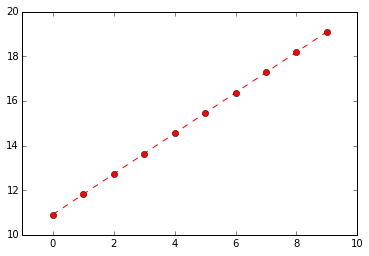

In [60]:
import matplotlib.pyplot as plt

plt.plot(x,'ro--')
plt.xlim([-1,10])

# This linear interpolation --> e.g. Diffusion problems, Laplace del^2 T = 0

In [47]:
n = 1000
A_dense = tridiag_121(n)
b = np.zeros(n)
A_sparse = tridiag_121_sparse(n)
b = np.zeros(n)
b[0] = -10.
b[-1] = -20.

In [51]:
%%timeit
np.dot(np.linalg.inv(A_dense), b)

10 loops, best of 3: 125 ms per loop


In [52]:
%%timeit
x = np.linalg.solve(A_dense,b)

10 loops, best of 3: 33.5 ms per loop


In [53]:
%%timeit
x_sparse = spsolve(A_sparse,b)

1000 loops, best of 3: 505 µs per loop


In [65]:
mmm = np.ones(1)